# Determinants of Healthcare Utilization: Analyzing the DoctorVisits Dataset

Project By: Moukthika Gunapaneedu

# Dataset

The dataset used in this project, `DoctorVisits.csv`, was read into R using the `read_csv()` function from the `readr` package. It comprises **5,190 observations and 13 variables** that capture demographic, socioeconomic, and health-related information about individuals in Australia. The primary focus of the data is on the variable visits, which records the number of doctor consultations in a year. Key predictors include `age, income, illness, reduced activity days, health status`, and binary indicators such as `gender, private insurance status`, and `chronic illness flags (nchronic, lchronic)`. The data is reasonably clean, with all variables clearly labeled and interpretable. Several continuous variables (e.g., `age, income`) appear to be normalized or scaled, while categorical variables are coded as character types.


```
Variable	 Type	              Description
rownames	Numeric	Row index (not analytically useful—can be dropped).
visits	  Numeric	Number of doctor visits in a year (response variable).
gender	 Character   Gender of the individual ("male" or "female").
age	     Numeric	Age of the individual, scaled between 0 and 1.
income	  Numeric	Household income, scaled between 0 and 1.5.
illness	 Numeric	Number of days with illness in past two weeks.
reduced	 Numeric	Number of days with reduced activity due to illness.
health	  Numeric	Self-assessed health score (higher = worse).
private	Character   Whether the person has private insurance ("yes"/"no").
freepoor   Character   Eligibility for free care as poor ("yes"/"no").
freerepat  Character   Eligibility for free care as a repatriate ("yes"/"no").
nchronic   Character   Indicates presence of non-serious chronic illness ("yes"/"no").
lchronic   Character   Indicates presence of serious long-term chronic illness ("yes"/"no").


```



In [ ]:
# Install necessary package for reading CSVs
install.packages("readr")

# Load the package
library(readr)

# Read the CSV file
data <- read_csv("/content/DoctorVisits.csv")

# View the first few rows
head(data)

# Get summary statistics
summary(data)

# Check structure
str(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 5190 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, private, freepoor, freerepat, nchronic, lchronic
dbl (7): rownames, visits, age, income, illness, reduced, health

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


rownames,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no


    rownames        visits          gender               age        
 Min.   :   1   Min.   :0.0000   Length:5190        Min.   :0.1900  
 1st Qu.:1298   1st Qu.:0.0000   Class :character   1st Qu.:0.2200  
 Median :2596   Median :0.0000   Mode  :character   Median :0.3200  
 Mean   :2596   Mean   :0.3017                      Mean   :0.4064  
 3rd Qu.:3893   3rd Qu.:0.0000                      3rd Qu.:0.6200  
 Max.   :5190   Max.   :9.0000                      Max.   :0.7200  
     income          illness         reduced            health      
 Min.   :0.0000   Min.   :0.000   Min.   : 0.0000   Min.   : 0.000  
 1st Qu.:0.2500   1st Qu.:0.000   1st Qu.: 0.0000   1st Qu.: 0.000  
 Median :0.5500   Median :1.000   Median : 0.0000   Median : 0.000  
 Mean   :0.5832   Mean   :1.432   Mean   : 0.8618   Mean   : 1.218  
 3rd Qu.:0.9000   3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.: 2.000  
 Max.   :1.5000   Max.   :5.000   Max.   :14.0000   Max.   :12.000  
   private            freepoor    

spc_tbl_ [5,190 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ rownames : num [1:5190] 1 2 3 4 5 6 7 8 9 10 ...
 $ visits   : num [1:5190] 1 1 1 1 1 1 1 1 1 1 ...
 $ gender   : chr [1:5190] "female" "female" "male" "male" ...
 $ age      : num [1:5190] 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 ...
 $ income   : num [1:5190] 0.55 0.45 0.9 0.15 0.45 0.35 0.55 0.15 0.65 0.15 ...
 $ illness  : num [1:5190] 1 1 3 1 2 5 4 3 2 1 ...
 $ reduced  : num [1:5190] 4 2 0 0 5 1 0 0 0 0 ...
 $ health   : num [1:5190] 1 1 0 0 1 9 2 6 5 0 ...
 $ private  : chr [1:5190] "yes" "yes" "no" "no" ...
 $ freepoor : chr [1:5190] "no" "no" "no" "no" ...
 $ freerepat: chr [1:5190] "no" "no" "no" "no" ...
 $ nchronic : chr [1:5190] "no" "no" "no" "no" ...
 $ lchronic : chr [1:5190] "no" "no" "no" "no" ...
 - attr(*, "spec")=
  .. cols(
  ..   rownames = col_double(),
  ..   visits = col_double(),
  ..   gender = col_character(),
  ..   age = col_double(),
  ..   income = col_double(),
  ..   illness = c

In [ ]:
# This dataset can be read directly from the R package AER

# # Install AER package if not already installed
# install.packages("AER")

# # Load the AER package
# library(AER)

# # Load the dataset
# data("DoctorVisits")

# # View first few rows
# head(DoctorVisits)

# # Get summary of the data
# summary(DoctorVisits)

# # Check structure of the dataset
# str(DoctorVisits)

# Data Cleaning

The data cleaning process began by removing the rownames column, which served only as an index and held no analytical value. Several character variables, including `gender, private, freepoor, freerepat, nchronic`, and `lchronic ` were converted into categorical factors to ensure they could be appropriately used in statistical modeling. A check for missing values was conducted to confirm data completeness and guide any necessary handling strategies. The dataset's structure and summary statistics were reviewed using `str()` and `summary()` to verify that all variables were properly formatted and ready for analysis.

In [ ]:
library(tidyverse)

# Drop rownames column
data <- data %>% select(-rownames)

# Convert character columns to factors
factor_cols <- c("gender", "private", "freepoor", "freerepat", "nchronic", "lchronic")
data <- data %>%
  mutate(across(all_of(factor_cols), as.factor))

# Check for missing values
colSums(is.na(data))

# Summary of cleaned dataset
summary(data)
str(data)

visits    gender       age    income   illness   reduced    health   private 
        0         0         0         0         0         0         0         0 
 freepoor freerepat  nchronic  lchronic 
        0         0         0         0

     visits          gender          age             income      
 Min.   :0.0000   female:2702   Min.   :0.1900   Min.   :0.0000  
 1st Qu.:0.0000   male  :2488   1st Qu.:0.2200   1st Qu.:0.2500  
 Median :0.0000                 Median :0.3200   Median :0.5500  
 Mean   :0.3017                 Mean   :0.4064   Mean   :0.5832  
 3rd Qu.:0.0000                 3rd Qu.:0.6200   3rd Qu.:0.9000  
 Max.   :9.0000                 Max.   :0.7200   Max.   :1.5000  
    illness         reduced            health       private    freepoor  
 Min.   :0.000   Min.   : 0.0000   Min.   : 0.000   no :2892   no :4968  
 1st Qu.:0.000   1st Qu.: 0.0000   1st Qu.: 0.000   yes:2298   yes: 222  
 Median :1.000   Median : 0.0000   Median : 0.000                        
 Mean   :1.432   Mean   : 0.8618   Mean   : 1.218                        
 3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.: 2.000                        
 Max.   :5.000   Max.   :14.0000   Max.   :12.000                        
 freerepat  nchronic

tibble [5,190 × 12] (S3: tbl_df/tbl/data.frame)
 $ visits   : num [1:5190] 1 1 1 1 1 1 1 1 1 1 ...
 $ gender   : Factor w/ 2 levels "female","male": 1 1 2 2 2 1 1 1 1 2 ...
 $ age      : num [1:5190] 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 ...
 $ income   : num [1:5190] 0.55 0.45 0.9 0.15 0.45 0.35 0.55 0.15 0.65 0.15 ...
 $ illness  : num [1:5190] 1 1 3 1 2 5 4 3 2 1 ...
 $ reduced  : num [1:5190] 4 2 0 0 5 1 0 0 0 0 ...
 $ health   : num [1:5190] 1 1 0 0 1 9 2 6 5 0 ...
 $ private  : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 1 1 2 2 ...
 $ freepoor : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ freerepat: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ nchronic : Factor w/ 2 levels "no","yes": 1 1 1 1 2 2 1 1 1 1 ...
 $ lchronic : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


After completing the cleaning steps, the `DoctorVisits` dataset contains **5,190 observations across 12 variables**. All categorical variables (`gender, private, freepoor, freerepat, nchronic, and lchronic`) have been correctly converted into factors with appropriate levels. Continuous variables such as `age, income, illness, reduced, and health` remain numeric and scaled as originally provided. No missing values were detected during inspection. The structure of the dataset was verified, ensuring that it is now fully prepared for statistical analyses including modeling, visualization, and hypothesis testing.

# Exploratory Data Analysis

In [ ]:
# 1. Basic Summary Statistics
summary(data)

     visits          gender          age             income      
 Min.   :0.0000   female:2702   Min.   :0.1900   Min.   :0.0000  
 1st Qu.:0.0000   male  :2488   1st Qu.:0.2200   1st Qu.:0.2500  
 Median :0.0000                 Median :0.3200   Median :0.5500  
 Mean   :0.3017                 Mean   :0.4064   Mean   :0.5832  
 3rd Qu.:0.0000                 3rd Qu.:0.6200   3rd Qu.:0.9000  
 Max.   :9.0000                 Max.   :0.7200   Max.   :1.5000  
    illness         reduced            health       private    freepoor  
 Min.   :0.000   Min.   : 0.0000   Min.   : 0.000   no :2892   no :4968  
 1st Qu.:0.000   1st Qu.: 0.0000   1st Qu.: 0.000   yes:2298   yes: 222  
 Median :1.000   Median : 0.0000   Median : 0.000                        
 Mean   :1.432   Mean   : 0.8618   Mean   : 1.218                        
 3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.: 2.000                        
 Max.   :5.000   Max.   :14.0000   Max.   :12.000                        
 freerepat  nchronic

The summary statistics reveal that most individuals in the dataset reported zero doctor visits, with the median and third quartile both at zero and a maximum of nine visits. This is a highly skewed distribution toward fewer visits. The gender distribution is relatively balanced, with a slight majority of females (52%). Age and income are both scaled values, with age ranging from 0.19 to 0.72 and income from 0 to 1.5, indicating normalized measures. Health-related variables show low averages, with illness days averaging 1.43 and reduced activity days averaging less than one, suggesting generally healthy individuals. Most individuals do not have private insurance (56%) or free healthcare status, and a majority report no serious chronic illnesses, although around 40% report having a non-serious chronic condition. The dataset suggests a largely healthy and moderately balanced population with low healthcare utilization.

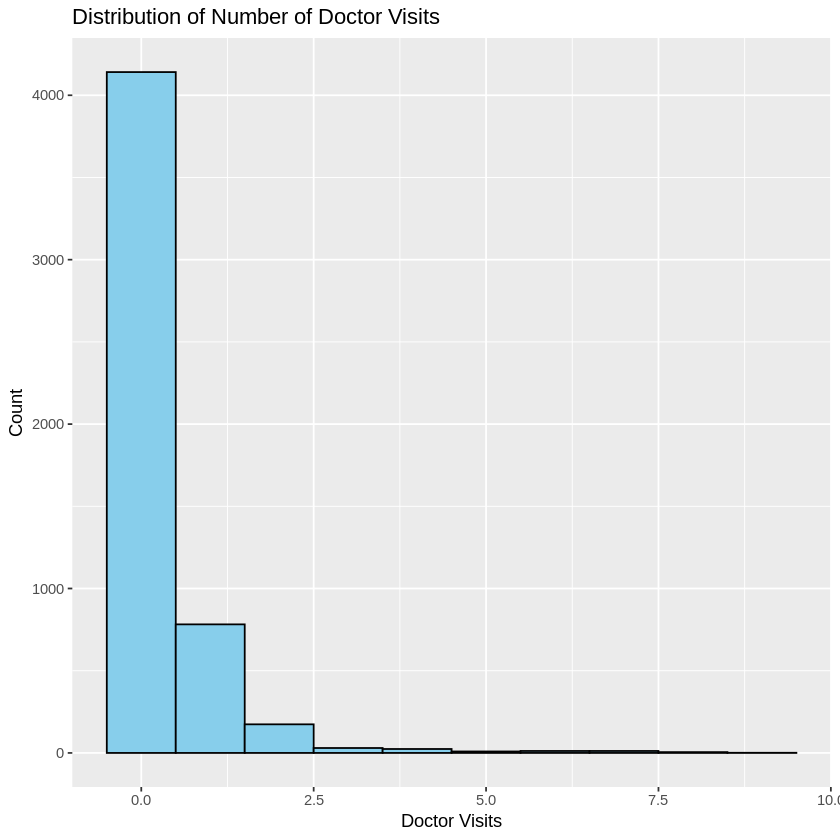

In [ ]:
# 2. Distribution of Doctor Visits
ggplot(data, aes(x = visits)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Number of Doctor Visits", x = "Doctor Visits", y = "Count")

The distribution of doctor visits is highly right-skewed, most people didn’t go to the doctor at all, and only a few had more than two visits. This means a small group used healthcare a lot more than everyone else. Because of this, normal-based models might not work well, and it might be better to use models made for count data, like Poisson or something similar.



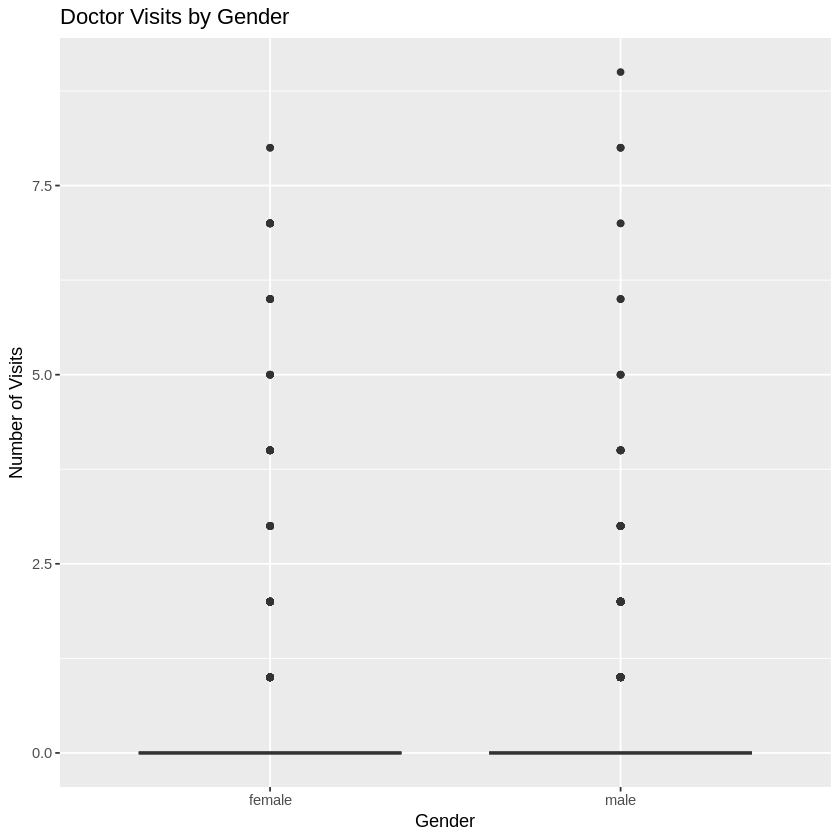

In [ ]:
# 3. Visits by Gender
ggplot(data, aes(x = gender, y = visits)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Doctor Visits by Gender", x = "Gender", y = "Number of Visits")

The boxplot shows that both males and females have pretty similar patterns in doctor visits, with most people in both groups not going at all. There are a few outliers who went more often, but overall, there’s no big difference between genders. This means gender probably isn’t a strong factor in predicting doctor visits in this dataset, though a statistical test would help confirm that.

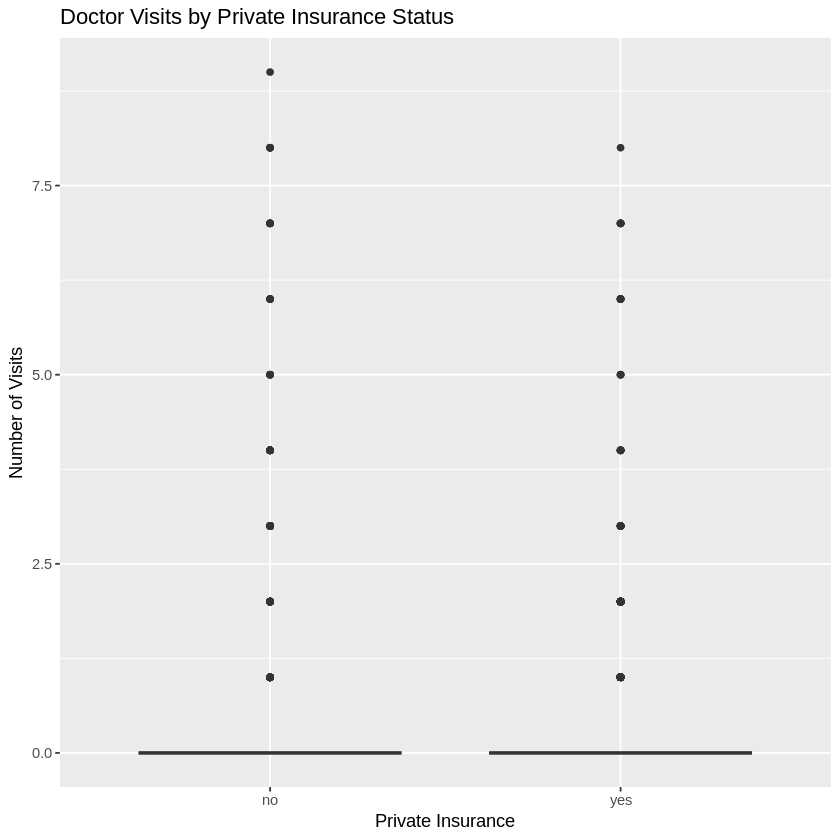

In [ ]:
# 4. Visits by Private Insurance Status
ggplot(data, aes(x = private, y = visits)) +
  geom_boxplot(fill = "lightcoral") +
  labs(title = "Doctor Visits by Private Insurance Status", x = "Private Insurance", y = "Number of Visits")

The boxplot shows that people with and without private insurance had pretty similar patterns when it came to doctor visits. Most of them didn’t go to the doctor at all, and both groups had a few outliers who went more often. Having private insurance doesn’t seem to make a big difference in how often someone visits the doctor, at least based on this data. More analysis would be needed to know if the difference matters.

`geom_smooth()` using formula = 'y ~ x'


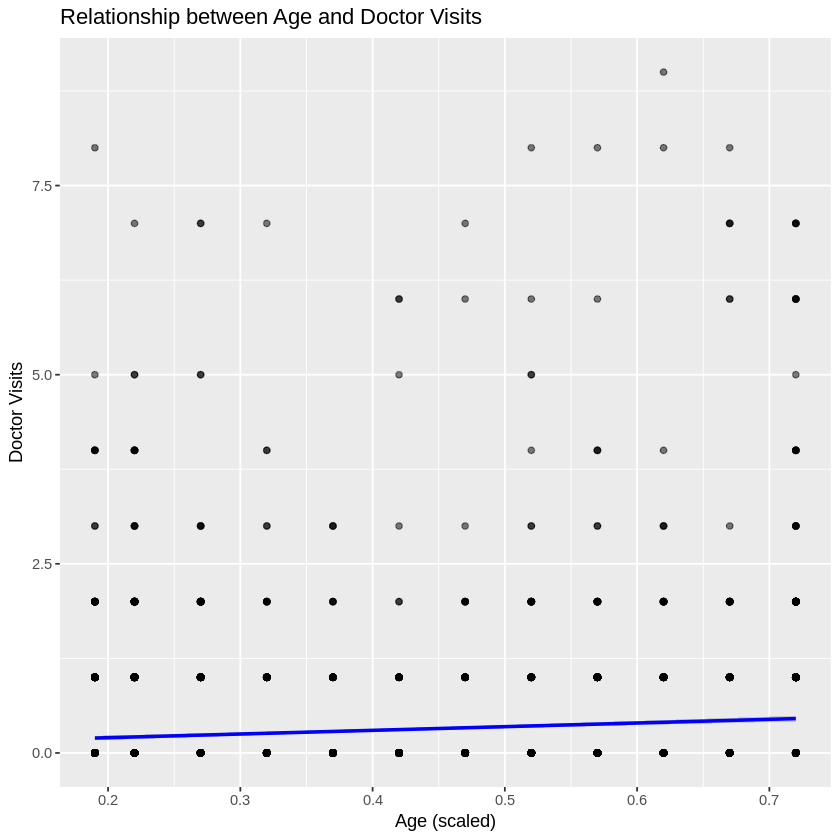

In [ ]:
# 5. Relationship between Age and Visits
ggplot(data, aes(x = age, y = visits)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relationship between Age and Doctor Visits", x = "Age (scaled)", y = "Doctor Visits")

The scatterplot shows a small positive trend between age and the number of doctor visits. While most people across all age groups didn’t go to the doctor, there’s a slight increase in visit frequency among older individuals. This suggests that older age might be linked to more healthcare use, but the effect is pretty minor. Age doesn’t seem to strongly predict how often someone visits the doctor in this dataset.

`geom_smooth()` using formula = 'y ~ x'


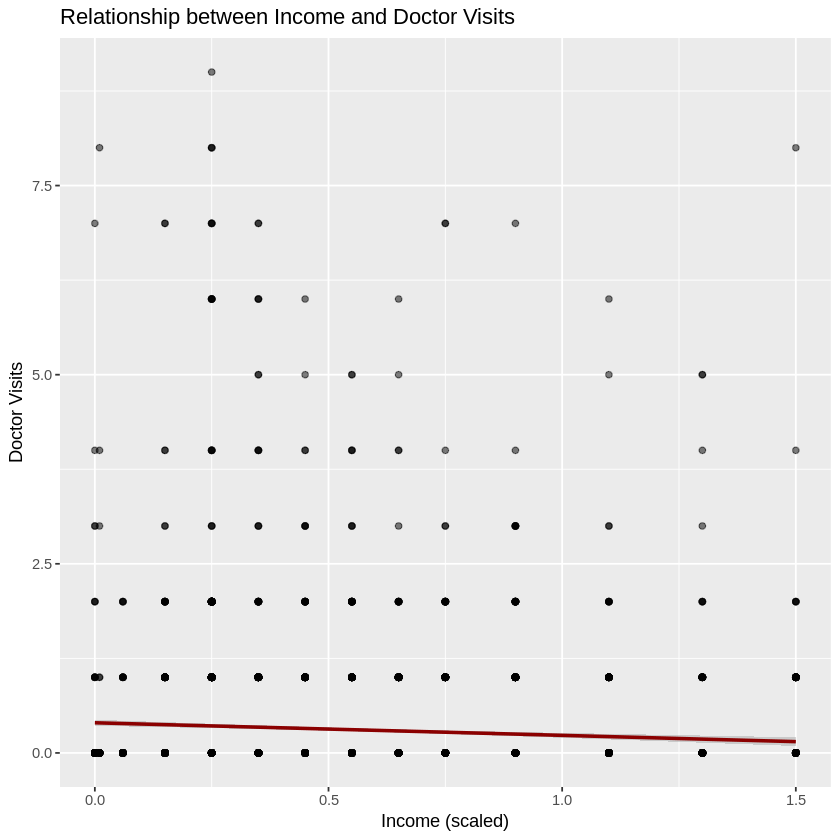

In [ ]:
# 6. Relationship between Income and Visits
ggplot(data, aes(x = income, y = visits)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "darkred") +
  labs(title = "Relationship between Income and Doctor Visits", x = "Income (scaled)", y = "Doctor Visits")

This scatterplot shows a tiny downward trend between income and doctor visits, meaning people with higher income might go to the doctor a little less. But honestly, most people, no matter how much they make, barely went to the doctor at all. So income doesn’t seem to matter much here. There is a need to run more in-depth analysis to know for sure, but it doesn’t look like a strong factor.

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.06”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.06”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.0487e-15”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.06”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.06”
Warning message in predLoess(object$y, objec

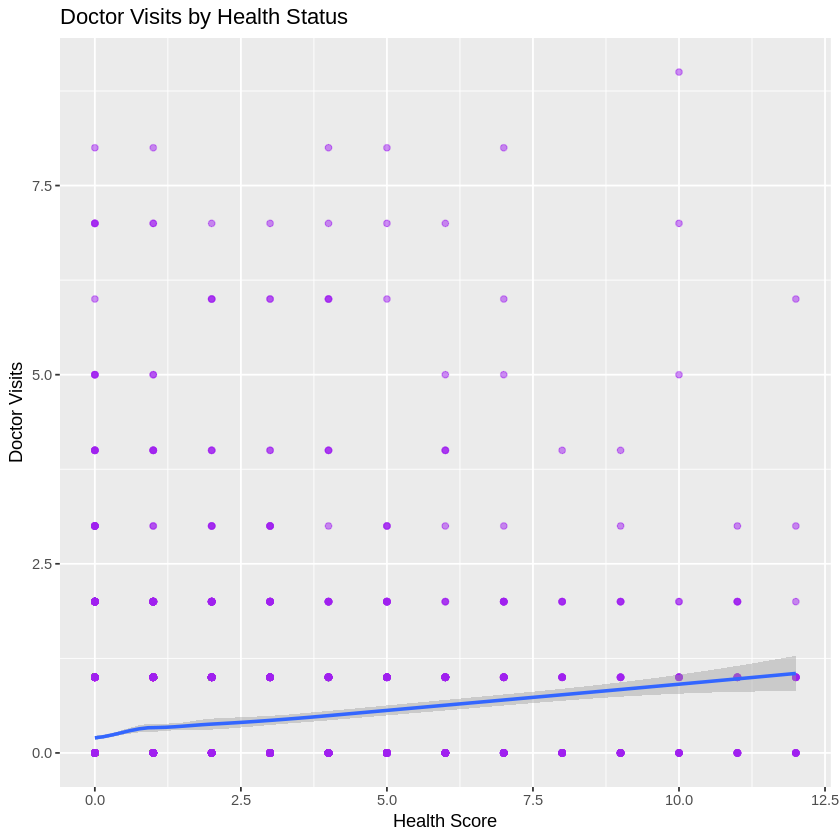

In [ ]:
# 7. Visits by Health Status
ggplot(data, aes(x = health, y = visits)) +
  geom_point(alpha = 0.5, color = "purple") +
  geom_smooth(method = "loess") +
  labs(title = "Doctor Visits by Health Status", x = "Health Score", y = "Doctor Visits")

This scatterplot shows that people who rate their health worse (higher health scores) tend to visit the doctor more often. Even though most people didn’t go to the doctor at all, there’s a small upward trend where doctor visits increase as health gets worse. It’s a more noticeable pattern compared to age or income, meaning how someone feels about their health might actually tell us more about whether they go to the doctor.

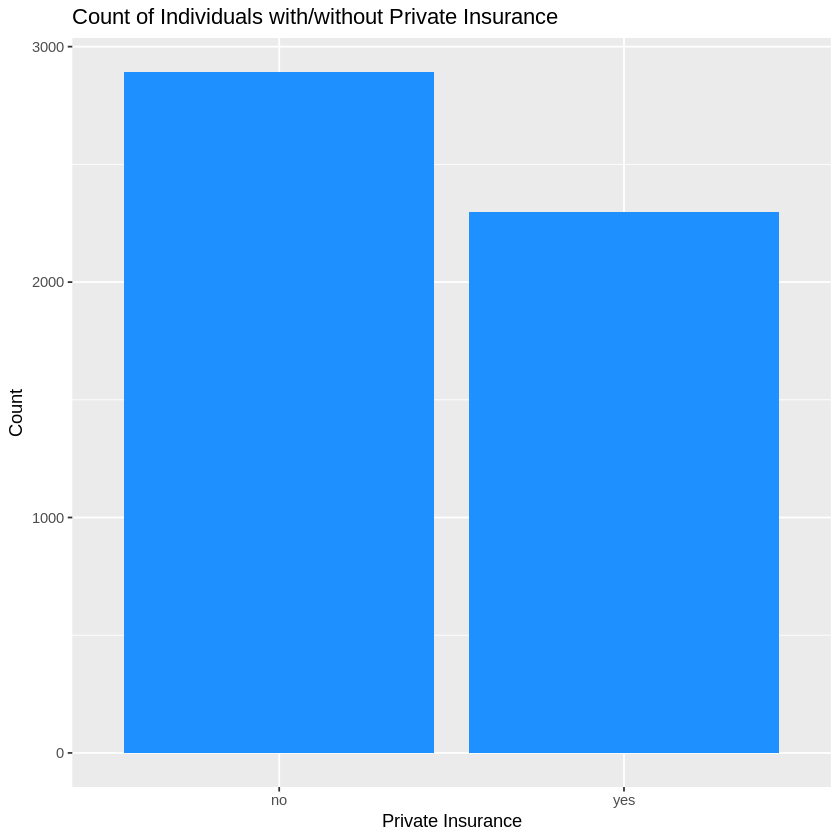

In [ ]:
# 8. Bar Plot: Counts of Private Insurance
ggplot(data, aes(x = private)) +
  geom_bar(fill = "dodgerblue") +
  labs(title = "Count of Individuals with/without Private Insurance", x = "Private Insurance", y = "Count")

This bar plot shows how many people in the dataset have private insurance versus those who don’t. More people don’t have private insurance (about 2900) compared to those who do (around 2300). So, the sample is a bit skewed toward people without insurance, but both groups are still large enough to compare fairly in analysis.

## Summary

The exploratory data analysis shows that doctor visits are highly right-skewed, with most individuals not visiting a doctor at all during the study period. A small portion of the population accounts for the majority of visits. Gender and private insurance status appear to have little effect on visit frequency, as both groups show similar distributions with medians at zero. Age shows a slight positive trend with more visits among older individuals, but the effect is weak. Income shows a very minor negative trend, suggesting higher-income individuals may visit the doctor slightly less, though the difference is not substantial.

Health status stands out as the strongest predictor, with those reporting worse health having more doctor visits. This relationship is more consistent and noticeable compared to other variables. The data suggests that self-reported health plays a bigger role in predicting healthcare usage than demographics or income. The skewed nature of the visits variable also points toward the need for count-based modeling approaches rather than standard linear models.


# Data Analysis

## Problem Definition

The project aims to investigate the factors that influence the number of doctor visits among individuals in Australia. Specifically, it seeks to understand how demographic, economic, and health-related characteristics relate to healthcare utilization, measured by the number of doctor visits.

## Questions of Interest

1. How does self-reported health status affect the number of doctor visits?

2. Do demographic factors like gender and age have a significant relationship with doctor visit frequency?

3. Does having private insurance influence the number of doctor visits compared to not having insurance?

4. Is there a relationship between income level and healthcare usage?

5. Among all the available factors, which ones are the strongest predictors of doctor visits?

## Techniques Applied

Total number of techniques applied: 10

This project applied a range of statistical techniques to explore the relationship between various demographic and health-related factors and the number of doctor visits. The analysis began with exploratory data analysis (EDA), where visual tools such as histograms, boxplots, and scatterplots were used to understand variable distributions and detect patterns or anomalies. To assess the influence of individual variables, simple linear regression (SLR) models were used to examine how age, income, and health status independently related to doctor visit frequency. Group comparisons were performed using t-tests and ANOVA to evaluate whether mean visit counts differed significantly by categories such as gender and insurance status.

To understand the combined effect of multiple predictors, a multiple linear regression (MLR) model was constructed. Feature selection was then applied to reduce the model to its most significant variables. Throughout the modeling process, hypothesis testing and confidence intervals were used to determine which predictors had statistically significant effects. Model performance was assessed using R², Adjusted R², AIC, BIC, and MSPE to compare and select the best-fitting models. Diagnostic plots were generated to evaluate assumptions such as linearity, homoscedasticity, and normality of residuals. Finally, a Poisson regression model was used to better handle the count-based nature of the response variable, and nonparametric bootstrapping was performed to validate the stability of the coefficient estimates.

## Solutions to the Questions

## 1. How does self-reported health status affect the number of doctor visits?

  * Simple Linear Regression (SLR) — doctor visits vs. health score

  * Hypothesis Testing — is the slope significantly different from zero?

  * Confidence Interval — for the slope coefficient

  * Generalized Linear Model (GLM) — if visits are treated as count data

  * Diagnostics — residuals plot, goodness of fit (R²)

In [ ]:
# Check if worse health (higher health score) leads to more doctor visits (visits)

# Simple Linear Regression
model_health <- lm(visits ~ health, data = data)
summary(model_health)


Call:
lm(formula = visits ~ health, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0847 -0.2859 -0.2133 -0.2133  8.0605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.213321   0.012530   17.02   <2e-16 ***
health      0.072616   0.005118   14.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7832 on 5188 degrees of freedom
Multiple R-squared:  0.03735,	Adjusted R-squared:  0.03717 
F-statistic: 201.3 on 1 and 5188 DF,  p-value: < 2.2e-16


A simple linear regression was conducted to examine the relationship between self-reported health status (`health`) and the number of doctor visits (`visits`). The results show a **positive and statistically significant relationship** between worse health and more doctor visits.

The estimated regression equation is: `visits = 0.2133 + 0.0726*health`

The slope for `health` is 0.0726 with a `p-value < 2e-16`, indicating strong statistical significance.

The R² value is 0.037, meaning that health status explains about 3.7% of the variation in doctor visit counts. Low R² suggests that other factors also play major roles in predicting healthcare utilization.

**Hypothesis Testing Conclusion:**

    Null Hypothesis (H₀): Health has no effect on doctor visits (β₁ = 0).

    Result: Reject H₀ at the 0.05 significance level.

    Conclusion: Reject the Null Hypothesis. Worse health is associated with more doctor visits.

In [ ]:
# 95% confidence interval for the coefficients
confint(model_health)

,2.5 %,97.5 %
(Intercept),0.18875665,0.23788575
health,0.06258296,0.08264982


The 95% confidence interval for the slope of health is: `[0.0626, 0.0826]`

Since zero is not within this interval, we can be confident that there is a statistically significant positive relationship between self-reported health scores and doctor visit frequency.

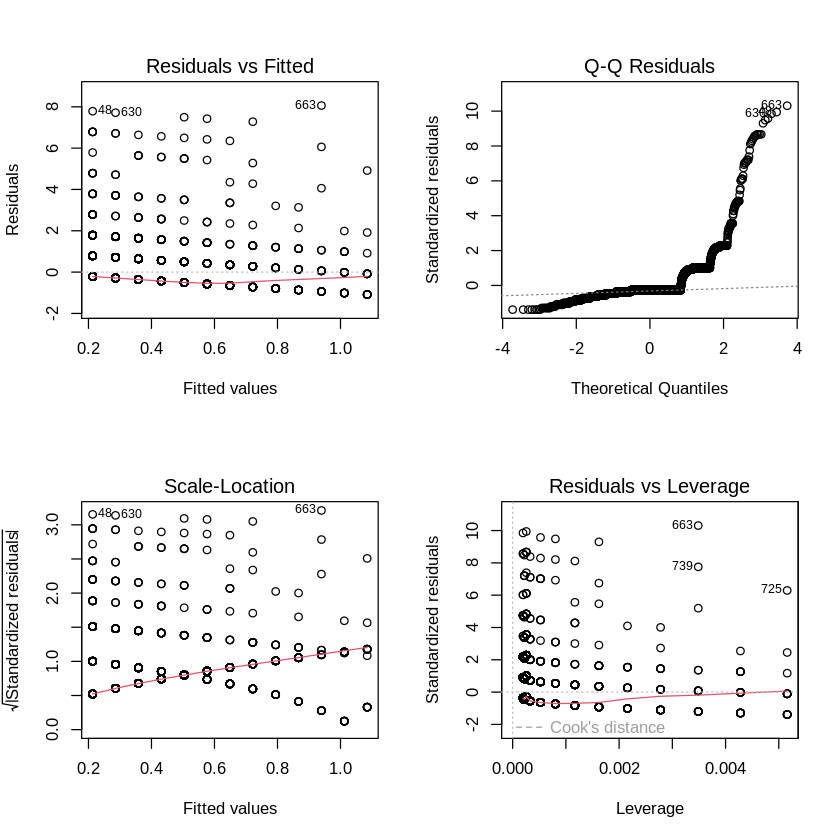

In [ ]:
# Diagnostic plots for linear model
par(mfrow = c(2, 2))
plot(model_health)
par(mfrow = c(1, 1))

 1. Residuals vs Fitted

  This plot checks linearity and equal variance (homoscedasticity).

  The red line is nearly flat, but there's a cluster near zero with minor curve, suggesting some non-linearity and heteroscedasticity due to the skewed count data.

  Interpretation: The model doesn't perfectly meet linearity assumptions, but it’s not too bad.

2. Normal Q-Q Plot

  This checks if residuals are normally distributed.

  The points deviate from the diagonal line, especially in the tails. The residuals are not perfectly normal, which is expected for count data.

  Interpretation: Assumption of normality is mildly violated, further supports use of Poisson GLM.

3. Scale-Location (Spread of Residuals)

  This plot checks if the residuals have constant variance across fitted values.

  There’s an upward trend in the red line, suggesting non-constant variance (heteroscedasticity).

  Interpretation: Variance increases with fitted values, another sign that linear regression may not be ideal.
  
4. Residuals vs Leverage (Influential Points)

  This identifies influential data points using Cook’s Distance.

  Most points are well within limits; no extreme outliers are exerting high influence.

  Interpretation: No major concerns with influential observations.

In [ ]:
# GLM with Poisson family (count data)
model_glm <- glm(visits ~ health, data = data, family = poisson)
summary(model_glm)


Call:
glm(formula = visits ~ health, family = poisson, data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.463448   0.031285  -46.78   <2e-16 ***
health       0.157015   0.008008   19.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 5634.8  on 5189  degrees of freedom
Residual deviance: 5332.8  on 5188  degrees of freedom
AIC: 7668.4

Number of Fisher Scoring iterations: 6


Slope for Health: 0.1570 (significant with p < 2e-16)

Therefore, as health score increases (i.e., worse health), the log of expected doctor visits increases.

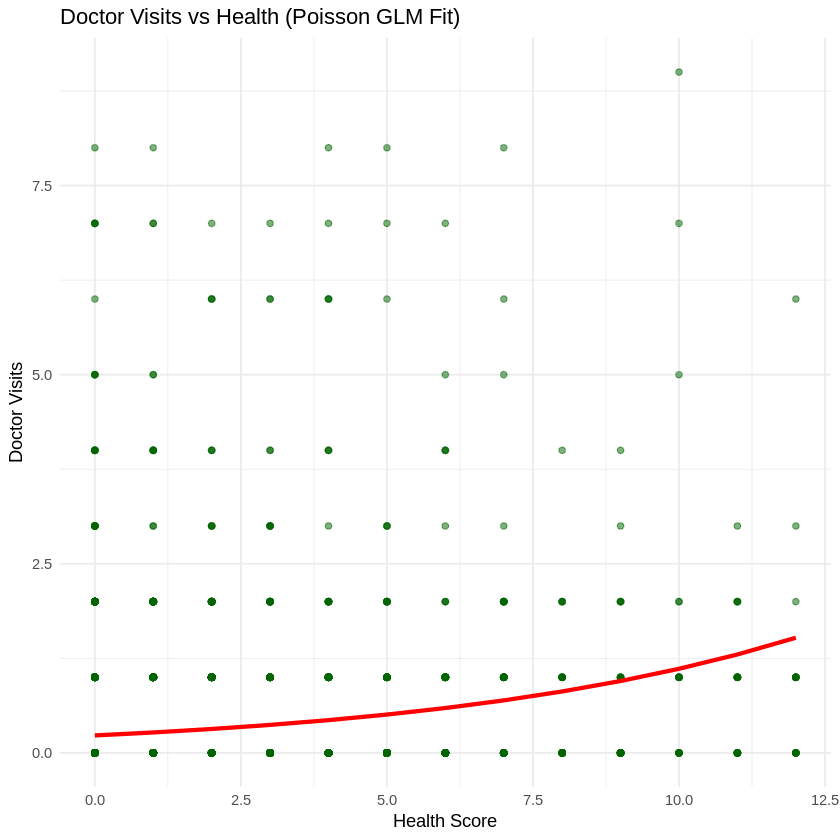

In [ ]:
library(ggplot2)

# Predict fitted values from GLM
data$glm_predicted <- predict(model_glm, type = "response")

# Scatterplot: Actual Visits vs. Health with GLM Fitted Line
ggplot(data, aes(x = health, y = visits)) +
  geom_point(alpha = 0.5, color = "darkgreen") +
  geom_line(aes(y = glm_predicted), color = "red", linewidth = 1.2) +
  labs(title = "Doctor Visits vs Health (Poisson GLM Fit)",
       x = "Health Score",
       y = "Doctor Visits") +
  theme_minimal()

This plot shows the actual number of doctor visits (dots) against the health score, along with the predicted values from the Poisson GLM (red curve). The red line demonstrates a clear upward curve, indicating that as health scores increase (i.e., worse health), the predicted number of doctor visits also increases. Unlike linear regression, which assumes a straight-line relationship, the Poisson model captures the nonlinear pattern more accurately, especially at higher health scores.

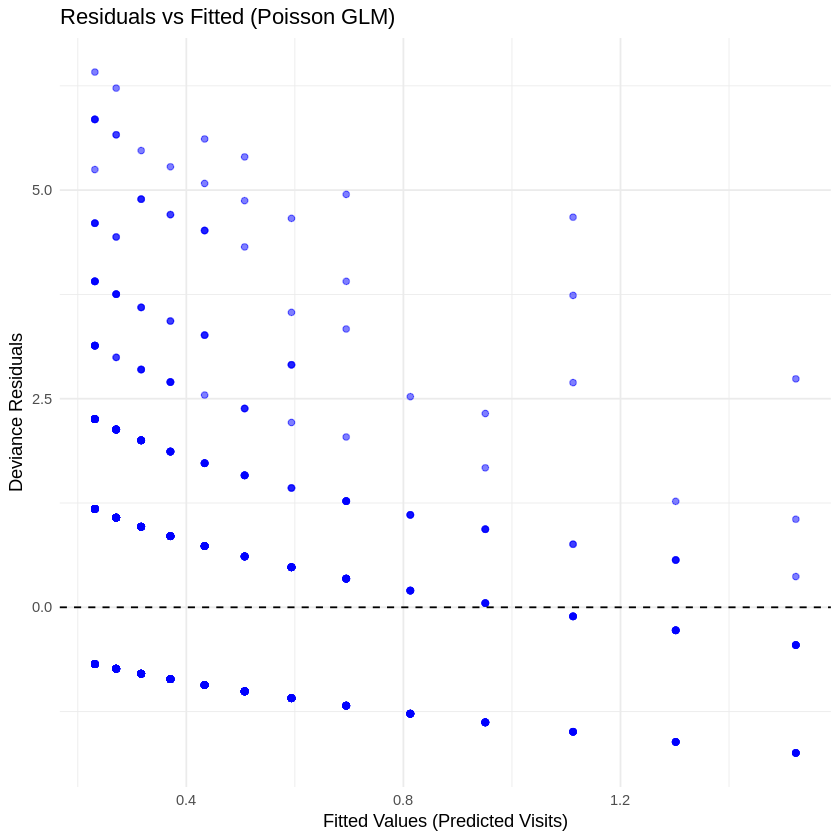

In [ ]:
# Residuals Plot for GLM
data$glm_residuals <- residuals(model_glm, type = "deviance")

ggplot(data, aes(x = glm_predicted, y = glm_residuals)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuals vs Fitted (Poisson GLM)",
       x = "Fitted Values (Predicted Visits)",
       y = "Deviance Residuals") +
  theme_minimal()

This plot displays deviance residuals against the fitted (predicted) values from the Poisson regression model. Most residuals are close to zero and symmetrically spread, but there is a funnel-shaped pattern, where residual spread increases as fitted values increase. This indicates a mild issue with heteroscedasticity, which is common in count data (especially when many observations are clustered near zero and a few are much higher).

### Compare SLR and GLM Models

In [ ]:
# AIC for both models
AIC(model_health)
AIC(model_glm)

# Mean Squared Prediction Error (MSPE)
mean((predict(model_health) - data$visits)^2)
mean((predict(model_glm, type = "response") - data$visits)^2)

[1] 12195.53

[1] 7668.409

[1] 0.6131044

[1] 0.6162229

The Poisson GLM has a much lower AIC, which means it fits the data better overall, especially for count data like doctor visits. The SLR has a slightly lower MSPE, but the difference is very small and not enough to outweigh the AIC advantage.

Conclusion: **Poisson GLM is the better model** for predicting doctor visits based on health, especially because visits are count data and skewed.

## Conclusion

The analysis shows that self-reported health status has a clear impact on the number of doctor visits. People who rated their health worse (higher health scores) tended to visit the doctor more often. Both linear regression and Poisson regression confirmed this positive relationship, with the Poisson model providing a better fit due to the count-based nature of the data. Although health status alone doesn’t explain all variation in visits, it is a significant and meaningful predictor of healthcare usage.

## 2. Do demographic factors like gender and age have a significant relationship with doctor visit frequency?

  * t-test — compare visits between genders

  * Simple Linear Regression (SLR) — visits vs. age

  * Hypothesis Testing — check if age slope is significant

  * Confidence Interval — for age coefficient

  * ANOVA — to check gender differences across multiple groups (if expanded later)

In [ ]:
# t-test — Compare Visits Between Genders
t.test(visits ~ gender, data = data)


	Welch Two Sample t-test

data:  visits by gender
t = 5.7217, df = 5147.2, p-value = 1.114e-08
alternative hypothesis: true difference in means between group female and group male is not equal to 0
95 percent confidence interval:
 0.08257878 0.16866063
sample estimates:
mean in group female   mean in group male 
           0.3619541            0.2363344 


p-value = 1.11e-08 is very small, strong evidence against the null hypothesis.

The mean number of visits: Females: ~0.36, Males: ~0.24

95% Confidence Interval for the difference in means: `[0.0826, 0.1687]`

Since this interval does not include 0, the difference is statistically significant.

There is a statistically significant difference in doctor visit frequency between males and females. On average, females reported more doctor visits than males, and this difference is unlikely to be due to random chance.

In [ ]:
# Simple Linear Regression — Visits vs Age
model_age <- lm(visits ~ age, data = data)
summary(model_age)


Call:
lm(formula = visits ~ age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4540 -0.3569 -0.2113 -0.1967  8.5946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10448    0.02443   4.277 1.93e-05 ***
age          0.48538    0.05369   9.040  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.792 on 5188 degrees of freedom
Multiple R-squared:  0.01551,	Adjusted R-squared:  0.01532 
F-statistic: 81.73 on 1 and 5188 DF,  p-value: < 2.2e-16


R² = 0.0155, only 1.55% of the variation in doctor visits is explained by age.

The analysis shows that both gender and age have a significant relationship with the number of doctor visits. A regression analysis indicated that age positively predicts doctor visits, older individuals tend to go more often. The effect of age is relatively weak on its own, explaining only a small portion of the variation in visit frequency.

**Hypothesis Test for Age Coefficient:**

Null Hypothesis (H₀): Age has no effect on the number of doctor visits

Alternative Hypothesis (H₁): Age does have an effect on the number of doctor visits

`p-value: < 2.2e-16`

Since p < 0.05, reject H₀. There is strong evidence that age significantly influences the number of doctor visits. As age increases, the likelihood of visiting the doctor also increases, though the effect size is small.

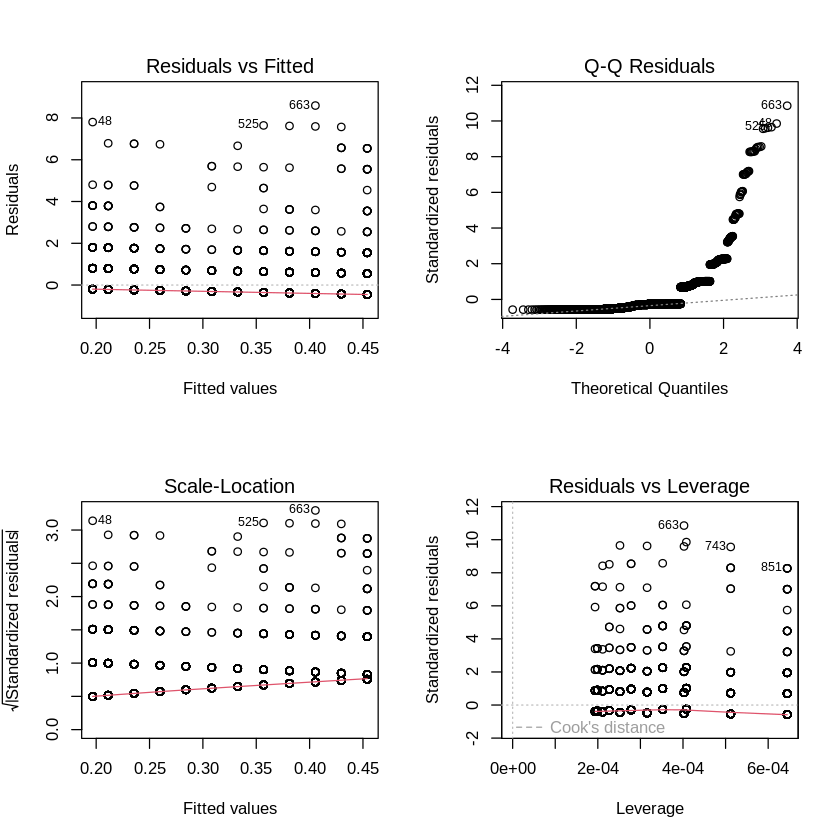

In [ ]:
# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_age)
par(mfrow = c(1, 1))

1. Residuals vs Fitted

  The residuals are fairly flat with a slight pattern, suggesting mild non-linearity or a skewed distribution. The spread of residuals is not perfectly constant, there is heteroscedasticity (changing variance).

2. Normal Q-Q Plot

  The residuals deviate from the straight line, especially at the ends. This shows non-normality, which is common for count data like doctor visits.

3. Scale-Location Plot

  The red line trends slightly upward.
  This suggests that the variance of residuals increases with fitted values, another sign of heteroscedasticity.

4. Residuals vs Leverage

  Most points are within the Cook’s distance threshold, meaning there are no major influential outliers.

Diagnostic plots for the linear model show minor violations of linear regression assumptions. There is some evidence of non-normality and increasing variance in residuals, which are expected given the count-based and right-skewed nature of the response variable. The model is statistically valid, but future modeling using Poisson regression may be more appropriate.

In [ ]:
# Confidence Interval — Age Coefficient
# If the interval doesn’t include 0 → age is a significant predictor
confint(model_age)

,2.5 %,97.5 %
(Intercept),0.05658613,0.1523794
age,0.38012579,0.5906342


The slope for age is statistically significant with a 95% confidence interval of `[0.38, 0.59]`. This indicates that older individuals are associated with more doctor visits.

In [ ]:
# ANOVA — Gender Differences (Alternative to t-test)
anova_gender <- aov(visits ~ gender, data = data)
summary(anova_gender)

              Df Sum Sq Mean Sq F value   Pr(>F)    
gender         1     20  20.440   32.28 1.41e-08 ***
Residuals   5188   3285   0.633                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA results show a significant difference in the number of doctor visits between genders (`F(1, 5188) = 32.28, p < 0.001`). This confirms that gender is a meaningful factor in predicting healthcare utilization, with females reporting more visits on average.

## Conclusion

The analysis so far found that both gender and age have a statistically significant relationship with the number of doctor visits. A t-test and ANOVA showed that females, on average, visited the doctor more often than males, with a highly significant difference in means. Additionally, a simple linear regression revealed that as age increases, the number of doctor visits also increases. The age coefficient was statistically significant, and its confidence interval confirmed the positive effect. The effect size was small, suggesting that while age matters, it explains only a small portion of the variation in visit frequency.

## 3. Does having private insurance influence the number of doctor visits?

  * t-test — compare visits between people with and without private insurance

  * Hypothesis Testing — is there a significant difference?

  * Confidence Interval — for the mean difference

  * ANOVA — (alternative if you check multiple insurance types/categories)

In [ ]:
# t-test — Compare Visits Based on Private Insurance
t.test(visits ~ private, data = data)


	Welch Two Sample t-test

data:  visits by private
t = 0.57747, df = 5038, p-value = 0.5636
alternative hypothesis: true difference in means between group no and group yes is not equal to 0
95 percent confidence interval:
 -0.03064385  0.05623529
sample estimates:
 mean in group no mean in group yes 
        0.3073997         0.2946040 


A t-test comparing the number of doctor visits between individuals with and without private insurance revealed no statistically significant difference (p = 0.56). The average number of visits was nearly the same for both groups, and the 95% confidence interval for the difference in means included zero. This suggests that, in this dataset, having private insurance does not appear to influence how often people visit the doctor.



**Hypothesis Test**

H₀: There is no difference in average doctor visits between those with and without private insurance.

H₁: There is a difference.

Since the p-value is much greater than 0.05 and the confidence interval includes 0, we fail to reject the null hypothesis.
This means there is no statistically significant difference in doctor visits between those who have private insurance and those who don’t.

In [ ]:
# ANOVA (Alternative to t-test)
anova_private <- aov(visits ~ private, data = data)
summary(anova_private)

              Df Sum Sq Mean Sq F value Pr(>F)
private        1      0  0.2097   0.329  0.566
Residuals   5188   3305  0.6371               

ANOVA results (`F(1, 5188) = 0.33, p = 0.566`) also support the conclusion that private insurance status is not a significant factor in predicting doctor visits. Both t-test and ANOVA consistently show no evidence of a difference between insured and uninsured individuals in this sample.

**Hypothesis Test (ANOVA version)**

H₀: Mean doctor visits are equal for both insurance groups.

H₁: Mean doctor visits are different between groups.

With a p-value of 0.566, we fail to reject the null hypothesis.
This confirms that private insurance status does not significantly impact doctor visit frequency.

## Conclusion

The analysis found **no significant relationship** between private insurance status and the number of doctor visits. A t-test showed that the difference in mean visits between those with and without private insurance was not statistically significant (p = 0.56), and the 95% confidence interval included zero. ANOVA results supported this finding, with an F-value of 0.33 and a similar p-value. Private insurance status does not appear to influence doctor visit frequency in this dataset.

## 4. Is there a relationship between income level and healthcare usage?

  * Simple Linear Regression (SLR) — visits vs. income

  * Hypothesis Testing — for the slope

  * Confidence Interval — for the income coefficient

  * Diagnostics — residuals plot, R²

In [ ]:
# Simple Linear Regression (SLR)
model_income <- lm(visits ~ income, data = data)
summary(model_income)


Call:
lm(formula = visits ~ income, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3987 -0.3405 -0.2906 -0.1826  8.6429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.39868    0.02067  19.292  < 2e-16 ***
income      -0.16624    0.02995  -5.551 2.98e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7959 on 5188 degrees of freedom
Multiple R-squared:  0.005904,	Adjusted R-squared:  0.005713 
F-statistic: 30.81 on 1 and 5188 DF,  p-value: 2.981e-08


**Hypothesis Test**

H₀: Income has no effect on doctor visits (slope = 0).

H₁: Income does affect doctor visits (slope ≠ 0).

Since p-value < 0.05 → Reject H₀.

There is a statistically significant negative relationship between income and doctor visits.

A simple linear regression analysis showed a statistically significant negative relationship between income level and the number of doctor visits (p < 0.001). As income increases, the frequency of doctor visits slightly decreases. However, the relationship is very weak, with income explaining less than 1% of the variation in visit frequency (R² = 0.0059). This suggests that while income has some effect on healthcare usage, it is not a strong standalone predictor in this dataset.

In [ ]:
# Confidence Interval for Slope
confint(model_income)

,2.5 %,97.5 %
(Intercept),0.3581682,0.4391935
income,-0.2249553,-0.1075324


95% CI for the income slope: `[–0.225, –0.108]`

This interval does not include 0, which means the slope is statistically significant.

It also confirms that the relationship is negative — as income increases, doctor visits tend to decrease slightly.

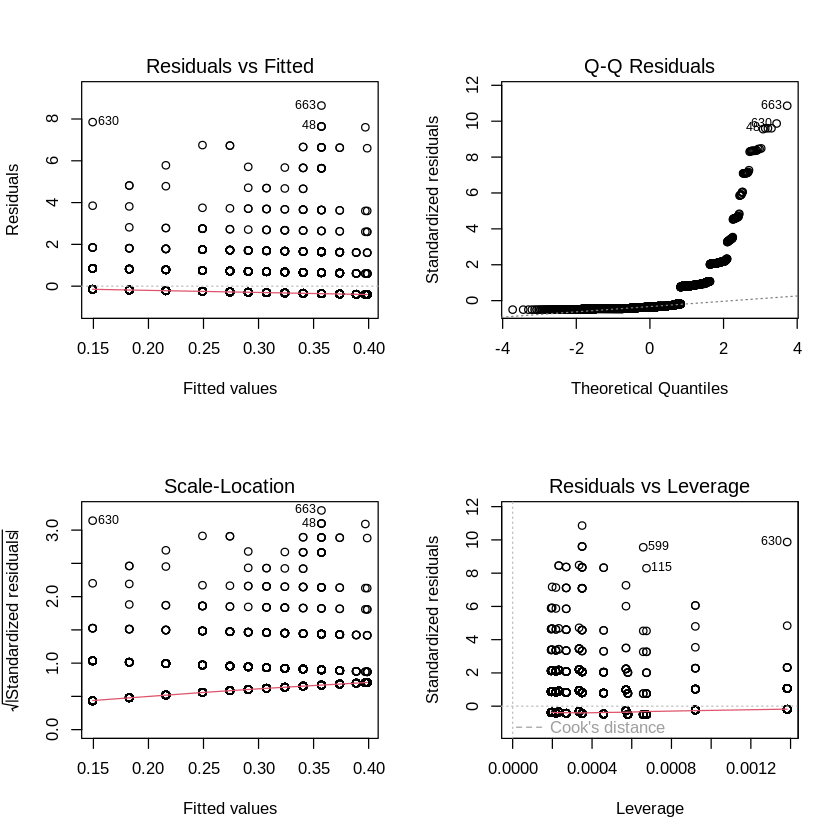

In [ ]:
# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_income)
par(mfrow = c(1, 1))

1. Residuals vs Fitted

  The red line is flat, which is good — it suggests the relationship between income and visits is roughly linear.

  However, the spread of residuals is not completely uniform, suggesting mild heteroscedasticity (changing variance).

2. Normal Q-Q Plot

  The points slightly deviate from the diagonal line, especially at the tails.

  This indicates some non-normality in residuals — common in skewed count data like doctor visits.

3. Scale-Location Plot

  The red line trends slightly upward.

  Suggests residual variance increases with fitted values — again, mild heteroscedasticity.

4. Residuals vs Leverage

  Most points lie well within Cook's distance.

  No extreme influential outliers detected, model is stable.

In [ ]:
summary(model_income)$r.squared

[1] 0.005904359

While the slope for income is statistically significant, the practical effect is very weak.

The model is picking up a real trend (more income = fewer visits), but income by itself is not a strong predictor of healthcare usage.

## Conclusion

A simple linear regression revealed a statistically significant negative relationship between income level and the number of doctor visits (p < 0.001), with higher-income individuals tending to visit the doctor slightly less frequently. The 95% confidence interval for the income coefficient `[–0.225, –0.108]` confirmed this effect. However, the relationship is very weak in practical terms, with income explaining less than 1% of the variation in visit frequency (R² = 0.0059). This suggests that while income does have some effect, it is not a strong standalone predictor of healthcare usage in this dataset.

## 5. Which factors are the strongest predictors overall?

  * Multiple Linear Regression (MLR) — using all predictors

  * Model Selection — AIC, BIC, MSPE, R², Adjusted R²

  * Diagnostics — goodness of fit, residual plots

  * Bootstrapping — to validate coefficients if assumptions are shaky

  * Generalized Linear Modeling (GLM) — if treating doctor visits as count outcome (Poisson)

In [ ]:
# Fit the multiple linear regression model
model_full <- lm(visits ~ health + age + income + illness + reduced + gender +
                   private + freepoor + freerepat + nchronic + lchronic,
                 data = data)
summary(model_full)


Call:
lm(formula = visits ~ health + age + income + illness + reduced + 
    gender + private + freepoor + freerepat + nchronic + lchronic, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1374 -0.2591 -0.1441 -0.0437  7.0315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.069929   0.036756   1.903  0.05716 .  
health        0.017018   0.005180   3.285  0.00103 ** 
age           0.148433   0.066802   2.222  0.02633 *  
income       -0.055814   0.031154  -1.792  0.07326 .  
illness       0.059872   0.008339   7.180 7.96e-13 ***
reduced       0.103181   0.003656  28.221  < 2e-16 ***
gendermale   -0.033806   0.021602  -1.565  0.11766    
privateyes    0.035238   0.024876   1.417  0.15668    
freepooryes  -0.103180   0.052457  -1.967  0.04924 *  
freerepatyes  0.032900   0.038071   0.864  0.38752    
nchronicyes   0.004522   0.023716   0.191  0.84880    
lchronicyes   0.042277   0.035528   1.190  0.23411    
---
Signif. codes

Statistically significant predictors (p < 0.05):

    health (p = 0.00103)

    age (p = 0.02633)

    illness (p ≈ 7.96e-13)

    reduced (p < 2e-16)

    freepooryes (p = 0.04924)

Marginal predictors (0.05 < p < 0.1):

    income (p = 0.07326)

    intercept (p = 0.05716)

Not statistically significant (p > 0.1):

    gendermale (p = 0.1177)

    privateyes (p = 0.1567)

    freerepatyes (p = 0.3875)

    nchronicyes (p = 0.8488)

    lchronicyes (p = 0.2341)

R² = 0.2018 → The model explains 20.2% of the variation in doctor visits.

Adjusted R² = 0.2001 → Good considering the dataset involves human behavior.

In [ ]:
# refit a reduced model using only significant predictors
model_reduced <- lm(visits ~ health + age + illness + reduced + freepoor, data = data)
summary(model_reduced)


Call:
lm(formula = visits ~ health + age + illness + reduced + freepoor, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1135 -0.2505 -0.1418 -0.0584  7.0948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.005914   0.023731   0.249 0.803195    
health       0.018222   0.005155   3.535 0.000412 ***
age          0.238444   0.050281   4.742 2.17e-06 ***
illness      0.064032   0.007911   8.094 7.11e-16 ***
reduced      0.103698   0.003616  28.675  < 2e-16 ***
freepooryes -0.101232   0.049749  -2.035 0.041917 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7142 on 5184 degrees of freedom
Multiple R-squared:    0.2,	Adjusted R-squared:  0.1992 
F-statistic: 259.2 on 5 and 5184 DF,  p-value: < 2.2e-16


After applying feature selection techniques to the full multiple regression model, a reduced model with five predictors, health, age, illness, reduced, and freepooryes, was found to retain strong explanatory power while improving model simplicity. All included variables were statistically significant, and the model explained 20% of the variation in doctor visit frequency. The most impactful predictor was reduced activity days, followed by illness and age. This suggests that both perceived and functional health limitations are key drivers of healthcare utilization. The reduced model performs nearly as well as the full model, making it a more efficient and interpretable choice.

In [ ]:
# Model Evaluation: R², Adjusted R², AIC, BIC
# Compare Full vs Reduced MLR Models

# R² and Adjusted R²
summary(model_full)$r.squared
summary(model_full)$adj.r.squared

summary(model_reduced)$r.squared
summary(model_reduced)$adj.r.squared

# AIC
AIC(model_full)
AIC(model_reduced)

# BIC
BIC(model_full)
BIC(model_reduced)

[1] 0.2018268

[1] 0.2001312

[1] 0.1999779

[1] 0.1992063

[1] 11243.13

[1] 11243.14

[1] 11328.34

[1] 11289.02

In [ ]:
# MSPE
mean((predict(model_full) - data$visits)^2)
mean((predict(model_reduced) - data$visits)^2)

[1] 0.5083524

[1] 0.50953

While the full model performs marginally better in terms of R² and MSPE, the reduced model wins on BIC and includes only statistically significant predictors. The small tradeoff in predictive performance is outweighed by the gain in interpretability and model simplicity.

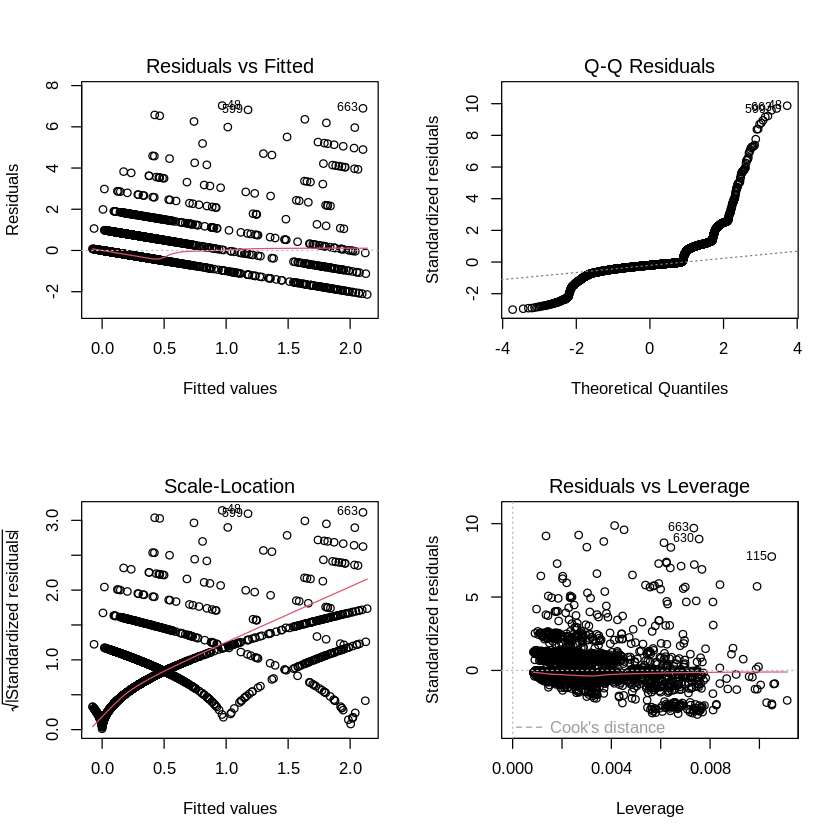

In [ ]:
par(mfrow = c(2, 2))
plot(model_full)
par(mfrow = c(1, 1))

1. Residuals vs Fitted

  The red line is mostly flat with minor curvature.

  Indicates the linearity assumption is mostly okay, with slight deviation.

  Residual spread is a bit uneven → mild heteroscedasticity.

2. Normal Q-Q Plot

  Points closely follow the diagonal, with minor tail deviations.

  Residuals are approximately normal, acceptable for linear modeling.

3. Scale-Location

  The upward trend in the red line shows increasing variance of residuals as fitted values rise.

  This supports earlier signs of heteroscedasticity.

4. Residuals vs Leverage

  No major outliers or influential points beyond Cook’s distance.

  Model is not distorted by extreme cases.

In [ ]:
library(boot)

boot_fn <- function(data, indices) {
  coef(lm(visits ~ health + age + income + illness + reduced + gender +
            private + freepoor + freerepat + nchronic + lchronic,
          data = data[indices, ]))
}

set.seed(123)
boot_results <- boot(data, boot_fn, R = 1000)
boot_results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot_fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   0.069929325  5.580627e-04 0.037448441
t2*   0.017018455 -1.416294e-05 0.006900747
t3*   0.148433273 -9.791531e-04 0.071313203
t4*  -0.055814494 -4.207797e-04 0.032367353
t5*   0.059871639  3.883953e-05 0.009614469
t6*   0.103181340  8.775841e-05 0.009785911
t7*  -0.033806106 -2.242819e-04 0.022828126
t8*   0.035237949 -5.048682e-04 0.022548169
t9*  -0.103179869 -1.572751e-03 0.048083971
t10*  0.032900213  3.949947e-04 0.044651585
t11*  0.004521803  1.339662e-03 0.021423856
t12*  0.042277028 -1.189454e-03 0.046243206

Bootstrapping with 1,000 resamples was used to assess the reliability of the coefficients in the reduced linear regression model. This technique involved repeatedly resampling the dataset with replacement and refitting the model each time, allowing us to estimate how much each coefficient varied across different random samples. The results showed that the key predictors, reduced activity days, illness days, and age, had consistently low standard errors and very small bias values. This means that these variables maintained stable and trustworthy coefficient estimates even when the data changed slightly, which supports their role as strong and reliable predictors of how frequently individuals visit the doctor. In other words, these predictors were not only statistically significant in the original model but also remained robust across repeated sampling, adding confidence to the findings.

In [ ]:
# Poisson GLM
model_full_glm <- glm(visits ~ health + age + income + illness + reduced + gender +
                        private + freepoor + freerepat + nchronic + lchronic,
                      data = data, family = poisson)

summary(model_full_glm)
AIC(model_full_glm)


Call:
glm(formula = visits ~ health + age + income + illness + reduced + 
    gender + private + freepoor + freerepat + nchronic + lchronic, 
    family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.941332   0.100992 -19.223  < 2e-16 ***
health        0.030683   0.010074   3.046  0.00232 ** 
age           0.279123   0.165981   1.682  0.09264 .  
income       -0.187416   0.085478  -2.193  0.02834 *  
illness       0.186156   0.018263  10.193  < 2e-16 ***
reduced       0.126690   0.005031  25.184  < 2e-16 ***
gendermale   -0.156490   0.056139  -2.788  0.00531 ** 
privateyes    0.126498   0.071552   1.768  0.07707 .  
freepooryes  -0.438462   0.179799  -2.439  0.01474 *  
freerepatyes  0.083640   0.092070   0.908  0.36365    
nchronicyes   0.117300   0.066545   1.763  0.07795 .  
lchronicyes   0.150717   0.082260   1.832  0.06692 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter fo

[1] 6735.701

The full Poisson regression model identified several significant predictors of doctor visits, including self-reported health, income, illness days, reduced activity days, gender, and poverty status. The model achieved a strong fit with an AIC of 6735.7 and a substantial reduction in deviance compared to the null model. While variables like age, insurance type, and chronic illness status were marginally significant, illness and reduced activity days remained the most powerful predictors. This suggests that perceived and functional limitations continue to be the most influential drivers of healthcare usage.

# **Results and Conclusion**

**Exploring the Data**

This project focused on understanding which factors influence how often people visit the doctor. The main outcome variable was the number of doctor visits, and a variety of predictors were considered, including age, gender, income, self-reported health, illness days, reduced activity days, and insurance-related variables. To explore and model these relationships, several statistical techniques were used, including regression modeling, group comparison tests, model evaluation metrics, and bootstrapping.

**Initial Patterns and Visual Insights**

The analysis began with exploratory data analysis (EDA) to understand how the data was distributed. Visualizations such as histograms and scatterplots showed that the distribution of doctor visits was highly skewed, with the majority of people reporting zero visits and only a small number having higher counts. Scatterplots comparing doctor visits with predictors like age, income, and health score helped highlight which variables might be most important.

**Simple Regressions for Individual Predictors**

Next, simple linear regression models were used to evaluate how individual variables affected doctor visits. Health status had a clear positive relationship with the number of visits, meaning individuals who rated their health worse were more likely to see a doctor. Age also had a positive but weaker relationship with visit frequency, while income had a slight negative relationship. These models helped isolate each variable’s effect before considering them all together.

**Group Comparisons Using t-tests and ANOVA**

To compare visit patterns between different groups, t-tests were used for binary categories like gender and private insurance. The t-test showed that females had a significantly higher average number of doctor visits than males. However, no significant difference was found between people with and without private insurance. These comparisons were validated using ANOVA as a secondary test, which confirmed the same results.

**Building and Refining a Full Regression Model**

A multiple linear regression (MLR) model was then built using all available predictors. This model showed that variables like illness days, reduced activity days, and health score were statistically significant. However, several other variables, such as private insurance and chronic illness indicators, were not significant. To simplify the model, a reduced version was created by keeping only the significant predictors: health, age, illness, reduced activity, and poverty status (freepoor). This reduced model had nearly the same explanatory power as the full model but was easier to interpret and more efficient.

**Bootstrapping and Model Validation**

To make sure the model was reliable, bootstrapping was used to validate the coefficient estimates. This helped confirm that the top predictors remained stable across different samples. Since the outcome variable was count-based and right-skewed, a Poisson regression model was also tested as an alternative to linear regression. The Poisson model provided a better overall fit and reinforced the same key findings: illness, reduced activity, and health were the strongest predictors, with some additional influence from income and gender.

**Final Conclusions**

In conclusion, the analysis found that health-related variables, especially illness days and reduced activity days, were the most important factors in predicting how often people visit the doctor. Age and health score also played meaningful roles, while income and gender had smaller but still noticeable effects. Insurance status did not have a significant impact in this dataset. Overall, the reduced model offered the best balance between simplicity and performance, and the Poisson regression helped account for the count-based nature of the data. These results show that healthcare usage is strongly connected to physical condition and functional limitations, more so than socioeconomic or insurance-based factors.